In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import os
import warnings
import cv2
import keras
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
from PIL import Image
from keras import models, layers, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import ImageFile

In [11]:
# Dinh nghia cac bien

gestures = {'L_': 'L',
           'fi': 'E',
           'ok': 'F',
           'pe': 'V',
           'pa': 'B'
            }

gestures_map = {'E': 0,
                'L': 1,
                'F': 2,
                'V': 3,
                'B': 4
                }


gesture_names = {0: 'E',
                 1: 'L',
                 2: 'F',
                 3: 'V',
                 4: 'B'}


image_path = '/content/drive/MyDrive/dataHandLang/data'
models_path = '/content/drive/MyDrive/dataHandLang/models/saved_model.hdf5'
rgb = False
imageSize = 224


In [12]:
# Ham xu ly anh resize ve 224x224 va chuyen ve numpy array
def process_image(path):
    img = Image.open(path)
    img = img.resize((imageSize, imageSize))
    img = np.array(img)
    return img

In [13]:
# Xu ly du lieu dau vao
def process_data(X_data, y_data):
    X_data = np.array(X_data, dtype = 'float32')
    if rgb:
        pass
    else:
        X_data = np.stack((X_data,)*3, axis=-1)
    X_data /= 255
    y_data = np.array(y_data)
    y_data = to_categorical(y_data)
    return X_data, y_data


In [14]:
# Ham duuyet thu muc anh dung de train
def walk_file_tree(image_path):
    X_data = []
    y_data = []
    for directory, subdirectories, files in os.walk(image_path):
        for file in files:
            if not file.startswith('.'):
                path = os.path.join(directory, file)
                gesture_name = gestures[file[0:2]]
                print(gesture_name)
                print(gestures_map[gesture_name])
                y_data.append(gestures_map[gesture_name])
                X_data.append(process_image(path))

            else:
                continue

    X_data, y_data = process_data(X_data, y_data)
    return X_data, y_data

In [15]:
# Load du lieu vao X va Y
X_data, y_data = walk_file_tree(image_path)

# Phan chia du lieu train va test theo ty le 80/20
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=12, stratify=y_data)

# Dat cac checkpoint de luu lai model tot nhat
model_checkpoint = ModelCheckpoint(filepath=models_path, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_acc',
                               min_delta=0,
                               patience=10,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
V
3
B
4
V
3
V
3
V
3
F
2
F
2
F
2
F
2
F
2
V
3
V
3
V
3
B
4
B
4
B
4
B
4
B
4
V
3
V
3
B
4
V
3
F
2
B
4
F
2
B
4
F
2
B
4
V
3
B
4
F
2
V
3
B
4
B
4
B
4
V
3
V
3
V
3
V
3
V
3
B
4
F
2
B
4
V
3
B
4
B
4
V
3
B
4
V
3
B
4
V
3
B
4
V
3
F
2
B
4
B
4
V
3
B
4
B
4
V
3
B
4
V
3
V
3
B
4
V
3
F
2
F
2
F
2
B
4
B
4
B
4
F
2
B
4
B
4
F
2
F
2
F
2
B
4
B
4
V
3
V
3
V
3
F
2
B
4
F
2
F
2
B
4
B
4
B
4
B
4
V
3
F
2
B
4
F
2
V
3
B
4
V
3
F
2
B
4
V
3
B
4
B
4
B
4
V
3
B
4
F
2
B
4
F
2
B
4
B
4
B
4
B
4
B
4
F
2
F
2
B
4
B
4
V
3
B
4
F
2
V
3
F
2
V
3
V
3
F
2
F
2
V
3
V
3
V
3
V
3
V
3
V
3
B
4
B
4
B
4
B
4
B
4
B
4
F
2
F
2
B
4
V
3
V
3
B
4
V
3
V
3
V
3
B
4
V
3
V
3
F
2
B
4
B
4
V
3
B
4
V
3
V
3
F
2
B
4
V
3
V
3
V
3
F
2
V
3
B
4
V
3
F
2
B
4
F
2
B
4
V
3
B
4
B
4
V
3
V
3
F
2
B
4
B
4
V
3
B
4
V
3
F
2
B
4
V
3
V
3
V
3
V
3
F
2
V
3
B
4
B
4
B
4
V
3
F
2
B
4
V
3
V
3
F
2
F
2
V
3
B
4
F
2
V
3
B
4
B
4
V
3
F
2
B
4
B
4
F
2
B
4
F
2
V
3
B
4
B
4
B
4
V
3
B
4
V
3
V
3
V
3
V
3
B
4
B
4
F
2
B
4
B
4
B
4
V
3
V
3
V
3
V
3
B
4
B
4
V
3
V
3

In [16]:
print(X_train.shape) 
print(y_train.shape)

(2206, 224, 224, 3)
(2206, 5)


In [19]:
# sử dụng thư viện tensorflow để xác định kích thước của từng tập dữ liệu huấn luyện
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 50
num_classes = 5
epochs = 20

In [24]:
# tạo mô hình để huấn luyện sử dụng thuật toán CNN để huấn luyện mô hình
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(224, 224 ,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [25]:
# Biên dịch mô hình 
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [27]:
# Huấn Luyện Mô hình''
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
45/45 [==============================] - 19s 137ms/step - loss: 0.9317 - accuracy: 0.6455 - val_loss: 0.4657 - val_accuracy: 0.8514
Epoch 2/20
45/45 [==============================] - 5s 117ms/step - loss: 0.2012 - accuracy: 0.9379 - val_loss: 0.3737 - val_accuracy: 0.8877
Epoch 3/20
45/45 [==============================] - 5s 116ms/step - loss: 0.0635 - accuracy: 0.9778 - val_loss: 0.3392 - val_accuracy: 0.9076
Epoch 4/20
45/45 [==============================] - 5s 116ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.4415 - val_accuracy: 0.9022
Epoch 5/20
45/45 [==============================] - 5s 116ms/step - loss: 0.0233 - accuracy: 0.9914 - val_loss: 0.4501 - val_accuracy: 0.9130
Epoch 6/20
45/45 [==============================] - 5s 116ms/step - loss: 0.0136 - accuracy: 0.9946 - val_loss: 0.3932 - val_accuracy: 0.9330
Epoch 7/20
45/45 [==============================] - 5s 117ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.4832 - val_accuracy: 0.9149
Epoch

In [28]:
# lưu mô hình được huấn luyện
model.save("/content/drive/MyDrive/dataHandLang/models/mymodel.h5")
print("Model Saved")

Model Saved


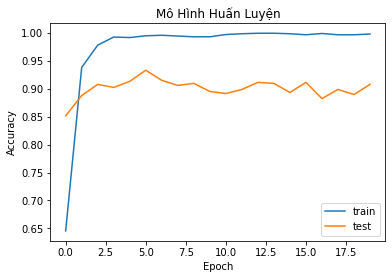

In [29]:
# xem quá trình huấn luyện thông qua biểu đồ
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Mô Hình Huấn Luyện")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.show()